In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"orxanmemmedzade","key":"46a0a7f3ee4431154432cbb15255f79d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

Dataset URL: https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
License(s): CC0-1.0


In [ ]:
!unzip -q '/content/sign-language-for-numbers.zip'

In [ ]:
import os


In [ ]:
for dirpath,dirnames,filenames in os.walk('/content/Sign Language for Numbers'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images is '{dirpath}'/")

There are 11 directories and 0 images is '/content/Sign Language for Numbers'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/3'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/5'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/4'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/9'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/8'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/0'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/7'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/6'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/1'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/unknown'/
There are 0 directories and 1500 images is '/content/Sign Language for Numbers/2'/


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import random

def view_random_image(target_dir, target_class):
    target_dir = pathlib.Path(target_dir) / target_class

    random_image = random.choice(os.listdir(target_dir))
    image_path = target_dir / random_image
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap= 'gray')
    plt.title(target_class)
    plt.axis("off")
    plt.show()

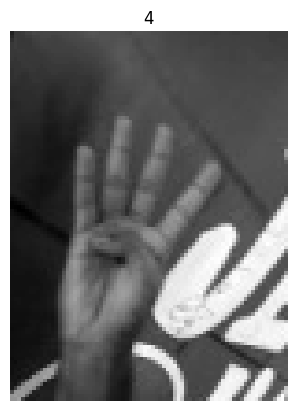

In [ ]:
view_random_image(target_dir="/content/Sign Language for Numbers", target_class="4")

In [ ]:
import shutil

shutil.rmtree('/content/Sign Language for Numbers/6')

In [ ]:
shutil.rmtree('/content/Sign Language for Numbers/7')
shutil.rmtree('/content/Sign Language for Numbers/8')
shutil.rmtree('/content/Sign Language for Numbers/9')

In [ ]:
shutil.rmtree('/content/Sign Language for Numbers/unknown')

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
data_path = "/content/Sign Language for Numbers"

train_data = tf.keras.preprocessing.image_dataset_from_directory(data_path,
                                                                 label_mode = 'categorical',
                                                                validation_split=0.2,
                                                                subset="training",
                                                                seed=42,
                                                                image_size=IMG_SIZE,
                                                                batch_size = 32,
                                                                crop_to_aspect_ratio=True,
                                                                color_mode='grayscale'
                                                                )

test_data = tf.keras.preprocessing.image_dataset_from_directory(data_path,
                                                                label_mode = 'categorical',
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                seed=42,
                                                                image_size=IMG_SIZE,
                                                                crop_to_aspect_ratio=True,
                                                                color_mode='grayscale'
                                                                )

Found 9000 files belonging to 6 classes.
Using 7200 files for training.
Found 9000 files belonging to 6 classes.
Using 1800 files for validation.


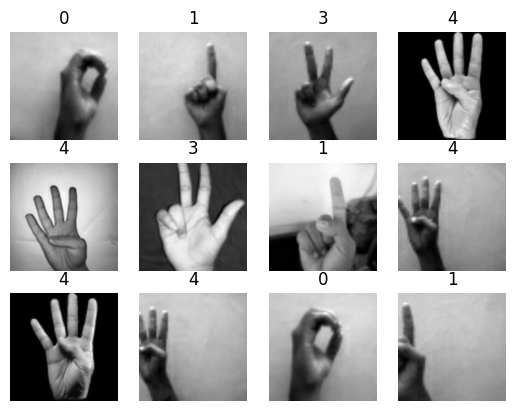

In [ ]:
import numpy as np
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(images[i] / 255, cmap = 'gray')
        plt.title(class_names[np.argmax(labels[i].numpy())])
        plt.axis("off")

In [ ]:

train_data.prefetch(buffer_size=tf.data.AUTOTUNE)
test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
#Base model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 1)),
    tf.keras.layers.Rescaling(1 / 255.),
    tf.keras.layers.Conv2D(64, kernel_size = 7, strides = 2, padding = 'same',
                           activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, kernel_size = 3, padding = 'same',
                           activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(128, kernel_size = 3, padding = 'same',
                           activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, kernel_size = 3, padding = 'same',
                           activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(256, kernel_size = 3, padding = 'same',
                           activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
history = model.fit(train_data, epochs =5, validation_data = test_data)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.1890 - loss: 2.1011 - val_accuracy: 0.5406 - val_loss: 1.3457
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.5152 - loss: 1.2478 - val_accuracy: 0.8317 - val_loss: 0.5655
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.7724 - loss: 0.6649 - val_accuracy: 0.8972 - val_loss: 0.3411
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.8562 - loss: 0.4400 - val_accuracy: 0.9167 - val_loss: 0.2534
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.8905 - loss: 0.3492 - val_accuracy: 0.9400 - val_loss: 0.1960


In [ ]:
inputs=tf.keras.layers.Input(shape=(224, 224, 1))

x = tf.keras.applications.efficientnet.preprocess_input(inputs)

x = tf.keras.layers.Concatenate()([inputs, inputs, inputs])

base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=x)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(6, activation = 'softmax')(avg)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.traniable = False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 357,
    decay_rate = 0.96

)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)
check_point = tf.keras.callbacks.ModelCheckpoint('best_model.keras',
                                                monitor = 'val_loss',
                                                save_best_only = True)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
model.fit(train_data, epochs = 8,
          validation_data = test_data,
          callbacks = [early_stopping, check_point])

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(None, 224, 224, 1))
  warnings.warn(msg)


225/225 ━━━━━━━━━━━━━━━━━━━━ 113s 176ms/step - accuracy: 0.8978 - loss: 0.2975 - val_accuracy: 0.9922 - val_loss: 0.0216
Epoch 2/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - accuracy: 0.9915 - loss: 0.0348 - val_accuracy: 0.9689 - val_loss: 0.0924
Epoch 3/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - accuracy: 0.9930 - loss: 0.0272 - val_accuracy: 0.9989 - val_loss: 0.0030
Epoch 4/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.9972 - loss: 0.0074 - val_accuracy: 0.9972 - val_loss: 0.0118
Epoch 5/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.9966 - loss: 0.0144 - val_accuracy: 0.9967 - val_loss: 0.0082
Epoch 6/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - accuracy: 0.9980 - loss: 0.0075 - val_accuracy: 0.9944 - val_loss: 0.0213


In [ ]:
model.evaluate(test_data)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9997 - loss: 0.0027


[0.003002951154485345, 0.9988889098167419]

In [ ]:
model.save('Sign_language.keras')